# David Notebook

# 1) SIR Model Intro for Team-Mates
SIR models provide a theoretical framework for the time rates of change of three populations in an outbreak of a contageous disease.

##  1.1) Introducing Variables and Parameters
The populations in the model are given the shorthand 
- $S$ for the number of people in the population that are suscptable to getting infected
- $I$ for the number of people that are infected
- $R$ for the people that are recovered from the disease (an are therefore imune, possibly only temporarily).

The three populations exchange members as time goes on as shown in the diagram below. For example, suscepable people become infected. The following directed graph shows the exchanges in the model with $a,~b,~c,$ and $\alpha$ as arbitary numbers. 

- $a$ is called **transmissability**
- $b$ is called **recovery rate**
- $c$ is called **deimunization rate**
- $\alpha$ is called **vccination rate**

<img src="./images/full_SIR.png" alt="drawing" width="400"/>

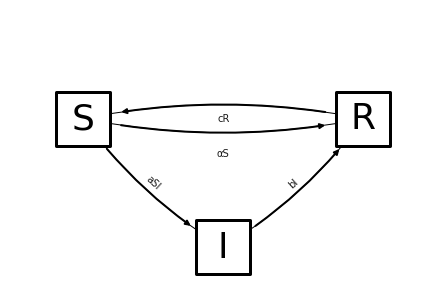

In [159]:
# this cell is just to generate the compartment diagram. 
import matplotlib.pyplot as plt
import networkx as nx # to draw graphs, including directed graphs

edges = [('S','I',{'label':'aSI'}),
         ('I','R',{'label':'bI'}), 
         ('R','S',{'label':'cR'}), 
         ('S','R',{'label':'\n\n\n\n\n\n\u03B1S'})
        ] # the \n's are a hack to separate labels
G = nx.DiGraph(edges)

# explicitly set positions
pos = {'S': (0, 0), 'I': (1, -.5), 'R': (2, 0)}

options = {
    'arrows':True,
    "font_size": 36,
    "node_size": 3000,
    'node_shape':'s',
#     'alpha' : 0.5,
    "node_color": "white",
    "edgecolors": "black",
#     "alpha" :0.0, # all of the node
    "linewidths": 3,
    "width": 2,
}

fig = plt.figure()
nx.draw(G, pos, 
        labels={node: node for node in G.nodes()},
        connectionstyle="arc3,rad=0.1",
        **options, 
        bbox=dict(facecolor='red', alpha=0.0, edgecolor='black'), # not working 
       )

edge_labels = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G, pos, 
                             edge_labels = edge_labels,
                             alpha=0.9, # does not expose arrows
                             bbox=dict(facecolor='red', alpha=0.0, edgecolor='black')
#                              connectionstyle="arc3,rad=0.1" #doesn't work to expose arrows
                            )
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
#                        label='lkajsdfkasdlfkjasdlfkj', # doesn't label edges, for legend
                      connectionstyle="arc3,rad=0.1" )

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
fig.savefig('images/SIR_compartments.png', transparent=True);
plt.axis("off");

## 1.2) Simple SIR 
As a simple example of an SIR model, consider the case where 
- recovered people never become susceptable, which corresponds to the value $c=0$,
- no vaccine exists, so susceptable people never become recovered without first becoming infected, which corresponds to $\alpha = 0$, and 
- the total population is 1 (which you can think of as $100\%$, or as 1 million people) and does not change in time. 

<img src="./images/simple_SIR.png" alt="drawing" width="300"/>

Then the time rates of change of the three categories are descibed by the non-linear ordinary differential equaiton

$$\frac{d}{dt}\left( \begin{array}{c}S \\ I \\ R  \end{array} \right) 
= 
\left( \begin{array}{c}-aSI \\ aSI -bI \\ bI   \end{array} \right) 
$$

Because the sum of the number of people in the three categries is, in our simplifying assumption, 1 million,
$$
1 =S+I+R \\
\Leftrightarrow 
R = 1-S-I.
$$

Removing the third row, $R$, since that number can be recovered from $S$ and $I$, yields 
$$\frac{d}{dt}\left( \begin{array}{c}S \\ I  \end{array} \right) 
= 
\left( \begin{array}{c}-aSI \\ aSI -bI    \end{array} \right) 
$$


### 1.2.1 Equilibrium Solutions to Simple Model
A common cenceptual checkpoint is to find the so called 'equilibrium solutions' to the differential equation. These are the constant functions that are solutions. Constant means that time rate of change is zero, and thus the equilibrium solutions are the solutions to 
$$\frac{d}{dt}\left( \begin{array}{c}S \\ I  \end{array} \right) 
= \left( \begin{array}{c}0 \\ 0    \end{array} \right) \\
\Leftrightarrow 
\left( \begin{array}{c}-aSI \\ aSI -bI    \end{array} \right) 
= \left( \begin{array}{c}0 \\ 0    \end{array} \right) \\
\Leftrightarrow 
\left\{ \begin{array}{c}-aSI =0 \\ \rm{and}\\ aSI -bI =0    \end{array} \right\} 
\Leftrightarrow 
\left\{ \begin{array}{c}S =0 \rm{~OR~} I=0 \\ \rm{and}\\ aSI = bI     \end{array} \right\} 
$$


$$
\Leftrightarrow 
\left\{ \begin{array}{c}S =0 \rm{~and~} I=0 \\ \rm{OR}\\ I=0 \rm{~and~} 0 = 0     \end{array} \right\} 
$$


The first conjunction of equations describes the equilibrium solution 
$$
\left( \begin{array}{c}S(t) \\ I(t) \\ R(t) \end{array} \right) 
= \left( \begin{array}{c} 0  \\ 0 \\  1 \end{array} \right),
$$
an equilibrium state in which all 1 million people in the population have recovered and will never be susceptable or infected again. 

The second conjunction of equations describes the equilibrium solutions of the form 
$$
\left( \begin{array}{c}S(t) \\ I(t) \\ R(t) \end{array} \right) 
= \left( \begin{array}{c} S_0  \\ 0 \\  1-S_0 \end{array} \right),
$$
which are equilibrium states in which some number $S_0$ of people are susceptable, $1-S_0$ are recovered, but since $0$ people are infected the disease is not spreading and these numbers do not change in time. 



## 1.2.2) Conditions of Decrease in Infections: Herd Immunity

In this simplified model, the condition for the number of infections to be decreasing in time 
$$
\frac{d}{dt} I <0\\
\Leftrightarrow
aSI-bI <0\\
\Leftrightarrow
S < \frac{b}{a}.
$$
That is, the disease begins to die out when less than $b/a$ people in the population remain susceptable. This is the point known as **herd immunity**.

In the following sectoins we will find the expression for heard immunity in the more complicated cases of the SIR model. 

## 1.3) SIR with Deimmunization and No Vaccine
If the only SIR model parameter (from $a,b,c,\alpha$) set to zero is the vaccination rate $\alpha$ then the modeling differntial equation becomes 

$$\frac{d}{dt}\left( \begin{array}{c}S \\ I \\ R  \end{array} \right) 
= 
\left( \begin{array}{c}-aSI \color{red}{+cR} \\ aSI -bI \\ bI \color{red}{-cR}   \end{array} \right) 
$$

and again the her immunity is the condition $\frac{d}{dt} I < 0 \Leftrightarrow S <\frac{b}{a}$.

<img src="./images/novax_SIR.png" alt="drawing" width="300"/>


Herd immunity is a desirable state. The question for public policy is how to intentianally approach this sufficiently small value of $S$. Thus, we head now toward answering the question "Quantitatively, how do vaccines hasten heard immunity?" 

To frame the answer to this question, we examine the differential equation further before including the effect of vaccination in the next section. The first component of the differential equation above reads
$$
\frac{d}{dt} S = -aSI +CR
$$

and we see a term desribing decreases $-aSI$ and a term describing increase. To head toward herd iimmunity, we want the decreasing term to win.  

Since the total population $p=S+I+R \Leftrightarrow R=p-S-I$, the rate of change of $S$ is also 
$$
\frac{d}{dt} S = -aSI +C(p-I-S) =  -cS -(aS+c)I +cp
$$
In the last expression we see a term describing increase ($+cp$) and two terms describing decrease ($-cS -(aS+c)I$). Thus the quantitave question "What can vaccines do to hasten heard immunity?" can be framed as "how does vaccination change the decreasing infection term $-cS -(aS+c)I$?"

## 1.4 SIR With Vaccine

Vaccination can be modeled as the compartment model drawn below; note the addition of an edge from $S$ ro $R$ with label $\alpha R$. 

<img src="./images/full_SIR.png" alt="drawing" width="400"/>

If a vaccine is administered to $\alpha$ percent of the susceptable population each unit of time (e.g. $\alpha=1\%$ every week) the the differential equation describing the populations becomes

$$\frac{d}{dt}\left( \begin{array}{c}S \\ I \\ R  \end{array} \right) 
= 
\left( \begin{array}{c} \color{red}{-\alpha S}-aSI+cR \\ aSI -bI \\ bI-cR   \end{array} \right) . 
$$

The condition for herd immunity remains 
$\frac{d}{dt} I < 0 \Leftrightarrow S <\frac{b}{a}.$
However, again impositing the constant population condition $R=p-S-I$, the rate of change of $S$ is 
$$
\frac{d}{dt} S =   -(c+\alpha)S -(aS+c)I +cp. 
$$
One sees that  one of the terms desribing a decrease in the susceptable population now desrcibes a more rapid decrease. 

### $$-(c+\alpha)S {\rm ~~ has~replaced~} -cS.$$  

In this way, vaccination hastens the approach toward the threshold for herd imunity $S = \frac{b}{a}$.

## 1.5) SIR Example with "Fake Data"


To demonstrate the time evolution of the three populations, the model below uses values that give a nice looking plot. 

In [1]:
import numpy as np
import pandas as pd

def SIR_sim(S0=.9,
            I0=.1,
            d = 100, 
            p = 1, 
            a = 10**(-3),
            b = 10**(-1), 
            c = 0,
            alpha = 0, 
            dt=1):
    """Takes initial populations and predicts populations at all later times.
    The function is defined with default values to enable group member to play with it."""
    # Initialize S,I,R
    S = pd.Series(data = np.zeros(d,))
    I = pd.Series(data = np.zeros(d,))
    R = pd.Series(data = np.zeros(d,))
    S[0] = S0
    I[0] = I0
    R[0] = p-S0-I0

    # calculate later values from initial values
    for t in range(0,d-1):
        dS = -a*S[t]*I[t]           * dt #ds/dt = -aSI 
        dI = (a*S[t]*I[t] - b*I[t]) * dt # dI/dt = aSI-bI
        dR = b*I[t]                 * dt 
        S[t+1] = S[t]+dS
        I[t+1] = I[t]+dI
        R[t+1] = R[t]+dR

    # collect into a data frame
    columns_SIR = ['day','S','I','R']
    eg = pd.DataFrame(columns = columns_SIR)
    eg['day'] = range(d+1)
    eg['S'] = S
    eg['I'] = I
    eg['R'] = R
    return eg


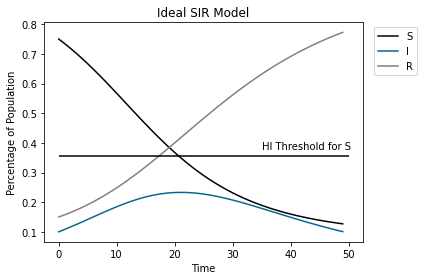

In [10]:
import matplotlib as mpl

# run sim with custom values
p = 1 # here we use 1 for 100% of the population
b = 1/14
# a = 0.001*(2.8+b)/p
a = 2.8*b/p

eg = SIR_sim(d=50,S0=.75,I0=.1,a=a,b=b)
import matplotlib.pyplot as plt
import seaborn as sns
#  e5f3ff , cfe2f3, 3c557d , 23395c, #e27f86
fig = plt.figure()
plt.plot(eg['day'], eg['S'],label='S', color = '#000000' ) 
plt.plot(eg['day'], eg['I'], label='I' , color = '#06688e') 
plt.plot(eg['day'], eg['R'], label ='R', color = 'grey') #black
plt.hlines(y=b/a,xmin=0,xmax=50, color ='#000000')
plt.text(x=35,y=0.38,s='HI Threshold for S')
plt.xlabel('Time')
plt.ylabel('Percentage of Population')
plt.title('Ideal SIR Model')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',)
plt.tight_layout()
fig.savefig('images/ideal_SIR.png', transparent=True);


# 2) Realistic values of parameters $a$ and $b$

To model real COVID infections in populations we need real values of the parameters that descibe COVID. 

## 2.1) Toward Realistic $b$

In SIR models, the term $-bI$ in the differential equation
$$
\frac{dI}{dt} =  aSI - bI,
$$ 
describes the rate at which infected people move into the recovered compartment. It is common knowledge that a case of COVID lasts about two weeks, or 14 days. 
For this reason we use 
# $$b =\frac{1}{14{\rm days}}.$$

As an example of why this is an intuitive value, if $b =\frac{1}{14{\rm days}} \rm{~ and~~} I=14{\rm ~people}$ 
then the number of people who recover in a day is 
$bI = 1 \frac{\rm person}{\rm day}.$

## 2.2) Toward realistic $a$

Our determination of a realistic value for $a$ takes more thought than for $b$. 

### 2.2.1) Introducing Reproductive Number Through Exponential Models 

SIR models are improvements upon expontial models in that 
- exponential models treat the susceptable population as infinitely large, 
- SIR models take into account that the susceptable population is finite and changes size. 

In an exponential growth model of disease transmission each infected person, over the duration of their infection, infects some number of susceptable people. This number is called **the reproductive number** of the disease. 

**If the reproductive number of a disease is less than 1 then the disease will die out.** 

To make this idea quantitative, let $b$ be the recovery rate (so $1/b$ is the durration of disease) and number $r_0$ be the reproductive number of a disease. 
The differential below above is then interpreted as "each day each infected person infects $r_0 b$ other people."

$$\frac{dI}{dt} = r_0 b  I.$$


This is called an exponential model because the solutions ($I$ as a function of time $t$) are the exponential functions of the form
$$I(t) = I_0(r_0b)^t$$
with $I(0)$ the number of infections when $t=0$. 
Changing base to Euler's number ($e$) the functions are
$$I(t) = I_0e^{\ln(r_0 b)t}.$$

The doubling time for the infection is $t_d$ such that $e^{\log(r_0 b)t_d}=2 \Rightarrow t_d = \ln(2)/\ln(r_0b).$

### 2.2.2) Reproductive number in SIR Models

SIR models have a similar feature, the reproductive number, but the value changes in time. 

Recall that in SIR models 
$$\frac{dI}{dt} =  aSI - bI$$ 
The first term is the number of new infections per time. Compare that term to the analagous term in exponential growth models;
$$ aSI \sim r_0bI.$$
The dynamics of the two terms are different; the product $aS$ changes in time while $r_0b$ does not change in time. As a result, the exponential model grows exponentially without end, but the SIR models infections peak and then decay to 0. 

Intuitively, when almost all of the population is susceptable $S\approx p$, the growth rate of $I$ is exponential. The similarity then takes on the form 
$$ aPI \sim r_0bI \\
\Leftrightarrow 
r_0 = p\frac{a}{b}.$$
This is the reproductive number of an SIR model in terms of the transmission rate $a$, recovery rate $b$, and population $p$. 
The <a href="https://www.omnicalculator.com/health/viral-infection-sir">measured value of $r_0$ for COVID </a>  is approxinately $2.8$.
This demands that the transmission rate of covid be 
 $$a =\frac{2.8 b}{p} = \frac{0.1}{p}.$$

### 2.2.3) Effective Reproductive Rate and Herd Immunity From Another Argument

When $S$ changes to below $p$ as the infectionstarts to spread, the reproductive rate becomes an effective reproductive rate

$$
r_{{\rm eff}} = S\frac{a}{b}.
$$

The condition that the disease starts to die out 
$$
r_{\rm eff}<1 \Leftrightarrow S\lt  \frac{b}{a}
$$
as presented through different means in section 1 above. 

### 2.4) Toward Realistic $c$ 

Estimates of how long immunity to COVID lasts have been the subject of considerable research, bebate, and disagreement. We use the order of magnitude estimate of immunity lasting for about 100 days, inline with 
<a href="https://www.cnn.com/2021/10/06/health/pfizer-vaccine-waning-immunity/index.html">the estimate of three months.</a> That is, we use 
 $$ c = \frac{1}{100 {\rm\,days}}.$$

### 2.5) Toward Realistic $p$

We will use the following number for the population of each US state and Washington DC obtained from April 1st, 2020 census column in the <a href="https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population">wikipedia page for US states listed by popoulation.</a>

In [11]:
populations = { 'AK':733391,'AL':5024279, 'AR':3011524, 'AZ':7_151_502, 
               'CA': 39_538_223, 'CO':5773714, 'CT':3605944, 'DC':689545, 
               'DE':989948, 'FL':21_538_187, 'GA':10_711_908,
               #            'HI', 
               'IA':3190369, 'ID':1839106, 'IL':12_812_508, 'IN':6785528, 'KS':2937880, 
               'KY':4505836, 'LA':4657757,'MA':7_029_917,'MD':6177224, 
               'ME':1362359,'MI':10_077_331,'MN':5706494,'MO':6154913, 
               'MS':2961279,'MT':1084225, 'NC':10_439_388, 
               'ND':779094, 'NE':1961504, 'NH':1377529,'NJ':9_288_994, 
               'NM':2117522,'NV':3104614, 'NY':20_201_249,'OH':11_799_448, 
               'OK':3959353, 'OR':4237256,'PA':13_002_700,'RI':1097379, 
               'SC':5118425, 'SD':886667, 'TN':6910840, 'TX':29_145_505,
               'UT':3271616, 'VA':8_631_393, 'VT':643077,'WA':7_705_281, 
               'WI':5893718, 'WV':1793716,'WY':576851}

### 2.6) Conclusion: Realistic Values of Parameters  $𝑎$ ,  $𝑏$, $c$ , and $p$

We conclude that, with units included,  

$$b=\frac{1}{14}\frac{\rm ppl}{\rm day},~~~~a  = \frac{0.2}{p \rm \, days},~~~~c = \frac{1}{100 \rm \, days}$$

and that $p$ will vary between the state populations we model.

# 3)  One dataset with all states' daily infection and vaccination numbers.


## 3.1) All States Infection Numbers

In order to calculate the number of infected people in time, we have available
- the cumulative number of people that have had covid, `tot_cases`
- the number of new cases in a day `new_case`.

Two equivalent methods of obtaining a proxy of the number of people infected:
- `df['tot_cases'].diff(14)` which is the cumulative number of cases today minus cumulative number of ases 14 days ago, thereby giving all current cases
- `df['new_case'].rollling(14).sum()` which is the sum of the new cases for the previous 14 day, and thus the number of current cases.

With either strategy, the number of cases for the first 14 days needcs to be approximated. I have chosen the numbers to be approximated the number of infections on the 14th day of the data set. 


In [12]:
# Afolabi's all state total cases:
df = pd.read_csv('../data/afolabi/all_states_raw.csv')
df.head()

,submission_date,state,tot_cases
0,2020-06-28T00:00:00.000,AK,887
1,2021-02-25T00:00:00.000,AK,55950
2,2021-12-05T00:00:00.000,AK,146558
3,2020-05-07T00:00:00.000,AK,374
4,2021-11-05T00:00:00.000,AK,136822


In [13]:
# datetime from string
df['submission_date'] = pd.to_datetime(df['submission_date'])
# total cases from string
df['tot_cases'] = df['tot_cases'].astype(float)

In [14]:
# create a data frame for infections

## create an index list for days by picking off one state: 
days = (df[df['state'] == 'AK']).sort_values(by='submission_date')['submission_date'].values

## create a data frame with those days as the index
infected = pd.DataFrame(index = days)

In [15]:
## data for one state at a time will be added. 

#try adding a column for one state
state = 'AK'
infected[f'{state}_I'] =  list((df[df['state'] == state]).sort_values(by='submission_date')['tot_cases'].diff(14))
infected[f'{state}_I'][0:14] = infected[f'{state}_I'][14].copy()
infected[53:55] # take a peek... looks good.

,AK_I
2020-03-16,1.0
2020-03-17,3.0


In [16]:
# Do this for all states except Hawaii, because HI's vax data is problematic (documented below)
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
            # 'HI', 
          'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
for state in states:
    # print(f'trying {state}')
    infected[f'{state}_I'] =  list((df[df['state'] == state]).sort_values(by='submission_date')['tot_cases'].diff(14))
    infected[f'{state}_I'][0:14] = infected[f'{state}_I'][15].copy()
infected.isnull().sum().sum() # check for missed entries


0

In [17]:
infected.to_csv('../data/infected_all_states.csv')

## 3.2) Daily Vaccination Numbers for All States

We pull from the cdc's api `data.cdc.gov/resource/8xkx-amqh.json` the following columns: 
- Date
- Recip_State,
- Recip_County,
- Series_Complete_Yes (the number of people who complete a vaccine series on that day)

In [158]:
import requests
import time

# initialize a df for vax
vax = pd.DataFrame()

states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
#            'HI', 
          'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
for state in states:
    time.sleep(1)
    url_vax = f'https://data.cdc.gov/resource/8xkx-amqh.json?$select=Date,Recip_State,Recip_County,Series_Complete_Yes&$where=Date%3E=%222020-12-01%22AND%20Date%3C%222022-03-21%22AND%20Recip_State=%27{state}%27&$limit=105000&$offset=0'
    # print(f'trying {state}')
    res_vax = requests.get(url_vax)
    if res_vax.status_code !=200:
        print(f'Status not ok for {state}')
        break
    data_vax= res_vax.json()
    df = pd.DataFrame(data_vax)
    # Make the data numerical and date time
    df['Date'] = pd.to_datetime(df['Date'])
    df['Series_Complete_Yes'] = df['Series_Complete_Yes'].astype(float)

    # sum over counties to get state level data
    df = df.groupby('Date').sum().sort_index()

    # write to the vax df
    vax[f'{state}_V'] = df['Series_Complete_Yes'].diff()
    vax[f'{state}_V'][0] = 0

    del df['Series_Complete_Yes']

vax

### 3.2.1) Hawaii is excluded because it's vax data is not findable with our api request.
This fact is demonstrated below.

In [ ]:
state = 'HI'
vax = pd.DataFrame()
url_vax = f'https://data.cdc.gov/resource/8xkx-amqh.json?$select=Date,Recip_State,Recip_County,Series_Complete_Yes&$where=Date%3E=%222020-12-01%22AND%20Date%3C%222022-03-21%22AND%20Recip_State=%27{state}%27&$limit=105000&$offset=0'
print(f'trying {state}')
res_vax = requests.get(url_vax)
if res_vax.status_code !=200:
    print(f'Status not ok for {state}')
    
data_vax= res_vax.json()
df = pd.DataFrame(data_vax)
# Make the data numerical and date time
df['Date'] = pd.to_datetime(df['Date'])
df.head(1)

Since `'Series_Complete_Yes'` is not a column here, the following line gives an error.

In [ ]:
# df['Series_Complete_Yes'] = df['Series_Complete_Yes'].astype(float)

## 3.3 Merging Infected and Vax on Dates

In [18]:
#read in vax data from file
vax = pd.read_csv('../data/all_state_vax.csv')
vax['Date'] = pd.to_datetime(vax['Date'])
vax.set_index('Date',inplace=True)


In [19]:
# merge infected and vax data on date
infected_vaxed = pd.merge(
         infected, vax, 
         left_on = infected.index, 
         right_on = vax.index, 
         how = 'inner',
                        ).set_index('key_0').fillna(0)

In [20]:
infected_vaxed.to_csv('../data/I_V_all_states.csv')

# 4) Real data from Oregon

Here we use the actual population of Oregon and the actual number of infected in Oregon from the first day of the dataset  to predict the number of cases at all later times. 

In [23]:
from sklearn.metrics import mean_absolute_error

In [21]:
#A fileter 
OR_filter = infected_vaxed.columns.str.contains('OR')
OR_filter.sum()
df = infected_vaxed.loc[:,OR_filter]
df.rename(columns = {'OR_I':'I_actual', 'OR_V':'V'}, inplace=True)
df

/var/folders/kl/2yh74fss7jj3r6_9sk1_4fmm0000gn/T/ipykernel_77625/1246242448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'OR_I':'I_actual', 'OR_V':'V'}, inplace=True)


,I_actual,V
key_0,,
2020-12-13,19733.0,0.0
2020-12-14,19579.0,0.0
2020-12-15,19438.0,0.0
2020-12-16,19462.0,0.0
2020-12-17,19643.0,0.0
...,...,...
2021-12-25,10377.0,25.0
2021-12-26,10377.0,5.0
2021-12-27,12576.0,3067.0


## 4.1)  SIR Extrapolation From Day 1

What does the SIR model say will be the course of the epidemic in Texas based off just day 1 in the dataset? This depends on the number of infections on that day $I_0$ and on the number of susceptable individulals, $S_0$. (Since $R_0 = p-I_0-S_0$ is note independent it is not needed.) Given $I_0$, the largest possible $S_0$ is $p-I_0$. But what fraction $r$ of the uninfected population $p-I_0$ was susceptable on that day? 

We define 

$$r = \frac{S_0}{p-I_0} .$$ 

### 4.1.1) An estimate for $r$

We formulate an estimate for $r$ based on the available data in our table and the population of Texas consider the equations 
$$r(p-I_0) = S_0,$$
$$(1-r)(p-I_0) = R_0,$$
$$1-r = \frac{R_0/p}{1-I_0/p}$$

Estimating $R_0$ to be the total cases,  
$$1-r \approx \frac{\left(1,464,374/29,145,505\right)}{\left(1+203,566/29,145,505\right)} =0.05$$
$$\Rightarrow r \approx 0.95$$.

There are several reasons this might be an underestimate for the fraction of the available population that was susceptable.
- The number of COVID cases could have been under reported
- A fraction of the public might be naturally immune to COVID. 

Thus, after running the model with this value, I will find the value that gives the best fit. 

### 4.1.2) Fit With Inital estimate for $r$

  As seen below, the SIR model with parameters as described above does terribly in fitting the actual data. 

In [24]:
def SIR_sim(S0,I0,V,d):
    """Takes initial populations and predicts populations at all later times.
    The function is defined with default values to enable group member to play with it."""
    # Initialize S,I,R
    S = pd.Series(data = np.zeros(d,))
    I = pd.Series(data = np.zeros(d,))
    R = pd.Series(data = np.zeros(d,))
    S[0] = S0
    I[0] = I0
    R[0] = p-S0-I0

    # calculate later values from initial values
    #no vaccination for now
    for t in range(0,d-1):
        S[t+1] = S[t] -a*S[t]*I[t] +c*R[t] -V[t]
        I[t+1] = I[t]+ a*S[t]*I[t] - b*I[t]
        R[t+1] = R[t]+ b*I[t] - c*R[t] +V[t]
    return S,I,R

# run sim with TEXAS values 
p = populations['OR'] 
b = 1/14 
a = .2/p
c = 1/100
d = len(df) #number of days to run simulation is length of list

#initial values:
I0 = df['I_actual'][0]
r = 0.95
S0 = r*(p-I0)
V = df['V']
# run simulation
S,I,R = SIR_sim(S0, I0,V,d)
        

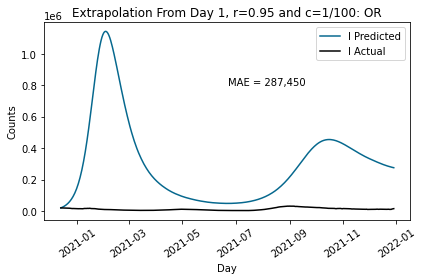

In [27]:
# plot
mae = mean_absolute_error(df['I_actual'],I)
# 06688e, 000000 # colors 
fig = plt.figure()

plt.plot(df.index, I,              label ='I Predicted', color = '#06688e')
plt.plot(df.index, df['I_actual'], label ='I Actual',    color = '#000000' )
plt.text(x=df.index[len(df)//2],y=800_000, s= f"MAE = {round(mae):,d}")
plt.title('Extrapolation From Day 1, r=0.95 and c=1/100: OR')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.xticks(rotation=35)
plt.legend()
plt.tight_layout()
fig.savefig('images/Oregon_long.png', transparent=True);

This is an amazing overestimate across all dates! 

### 4.2.3) Searching for $r$ Of Best Fit

Now I will find the value of $r$ that gives the minimum error of from day 1 predictions. 

In [28]:
#make sure to use texas values
p = populations['OR'] #29_145_505 # google TX pop
b = 1/14 
a = .2/p
c = 1/100
d = len(df) #number of days to run simulation is length of list

score_df = pd.DataFrame(columns = ['r','MAE'])
for r in np.linspace(0.01, 0.9, 100):
    #set initial values
    I0 = df['I_actual'][0]
    S0 = r*(p-I0)
    V = df['V']
    # run simulation
    S,I,R = SIR_sim(S0, I0,V, d)
    mae = mean_absolute_error(df['I_actual'],I)
    score_df.loc[len(score_df)] = [r,mae]

score_df.sort_values(by='MAE').iloc[0]

r           0.010000
MAE    159071.181862
Name: 0, dtype: float64

The apparent optimal value of $r$ is as low as r will go. How good of a fit is the resulting prediction curve? 

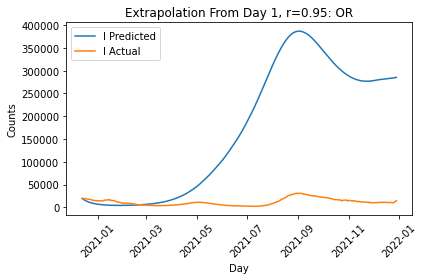

In [30]:
r = 0.01
c = 1/100
#initial values:
I0 = df['I_actual'][0]
S0 = r*(p-I0)
#actual vaccination rates
V = df['V']

# run simulation
S,I,R = SIR_sim(S0, I0,V, d)
mae = mean_absolute_error(df['I_actual'],I)
plt.plot(df.index, I, label='I Predicted')
plt.plot(df.index, df['I_actual'], label ='I Actual')
# plt.text(x=df.index[len(df)//2],y=5_000_000, s= f"MAE={round(mae,3)}")
plt.title('Extrapolation From Day 1, r=0.95: OR')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend();

The fit has improved in a sense, but still gives a wildly high prediction for most times compared to historical data. 

### 4.2.4) Gridsearching over $r$ and $c$ values

Because no value of $r$ gives a sufficiently low curve, I will now experiment with both $r$ and $c$.

In [32]:
#make sure to use texas values
score_df = pd.DataFrame(columns = ['r','c','MAE'])
for r in np.linspace(0.1, 0.4, 10):
    for c in np.linspace(1/10000,1/1000, 10):
    #set initial values
        I0 = df['I_actual'][0]
        S0 = r*(p-I0)
        # run simulation
        S,I,R = SIR_sim(S0, I0, V,d)
        mae = mean_absolute_error(df['I_actual'],I)
        score_df.loc[len(score_df)] = [r,c,mae]

score_df.sort_values(by='MAE').head(2)

,r,c,MAE
61,0.3,0.0002,9253.349477
60,0.3,0.0001,9254.217061


The model best fits the data when $r=30\%$ of the uninfected population is susceptable initially, and the deimmunization rate is $2/10,000$ 

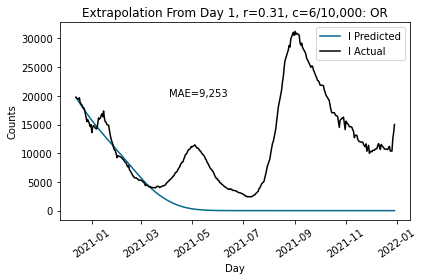

In [35]:
#initial values:
c = 2/10_000
I0 = df['I_actual'][0]
r = 0.3
S0 = r*(p-I0)
# run simulation
S,I,R = SIR_sim(S0, I0,V, d)
mae = mean_absolute_error(df['I_actual'],I)
fig = plt.figure()
# 06688e, 000000
plt.plot(df.index, I, label='I Predicted', color ='#06688e')
plt.plot(df.index, df['I_actual'], label ='I Actual', color = '#000000')
plt.text(x=df.index[len(df)//2 - 80],y=20_000, s= f"MAE={round(mae):,d}")
plt.title('Extrapolation From Day 1, r=0.31, c=6/10,000: OR')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.xticks(rotation=35)
plt.tight_layout()
plt.legend()
fig.savefig('images/Oregon_long_optimal.png', transparent=True);

This looks terrible, even if it is a good fit. I just want to fiddle and find values of $r$ and $c$ that look nice. 

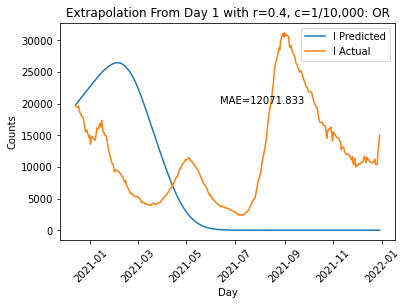

In [36]:
#initial values:
c = 1/10_000
I0 = df['I_actual'][0]
r = 0.4
S0 = r*(p-I0)
# run simulation
S,I,R = SIR_sim(S0, I0,V, d)
mae = mean_absolute_error(df['I_actual'],I)
plt.plot(df.index, I, label='I Predicted')
plt.plot(df.index, df['I_actual'], label ='I Actual')
plt.text(x=df.index[len(df)//2 - 10],y=20_000, s= f"MAE={round(mae,3)}")
plt.title('Extrapolation From Day 1 with r=0.4, c=1/10,000: OR')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend();

The pandemic did not play out as SIR predicts in the long run: there were complications like new variants and the introduction of vaccinations. Instead of making long term predictions with SIR, we now turn to making predictions 1 day out. 

### 4.2.5) Conclusion on Long Term Predictions

The parameters we are unsure of, $c$ and $S_0$, do not allow SIR to make long term predictions that resemble the course of the disease. This is to be anticipated; there were many complications in the course of the pandemic not captured by the model including
- public measures to reduce contact
- mask use
- hand washing
- moves  to remote work.

The general trend we see in attempting to use the most reasonable values of $c$ and $S_0$ is a predicted initial increase in cases far beyond what was observed. Thus, we begin to suspect that the disease spread much slower than SIR models predict. 

To test this hypothesis from anopther directoin, we now move to predicting the number of cases one day out, for every day in the data set. 

## 3.2) One Day Predictions with SIR For Oregon

In [37]:
#parameters 
p = populations['OR'] 
b = 1/14 # Recovery rate for duration 14 days
a = 2.8*b/p # transmission rate for reproduction number 2.8 and recovery rate 1/14
c = 1/100 # rate of immunity loss

def next_day_SI_withC(S,I,V):
    '''Predicts the number of infected tomorrow and number of susceptable tomorrow
    from number of infrected today 
    and number susceptable today'''
    
    S_next = S - a*S*I +c*(p-S-I) -V
    I_next = I + a*S*I -b*I
    return S_next,I_next

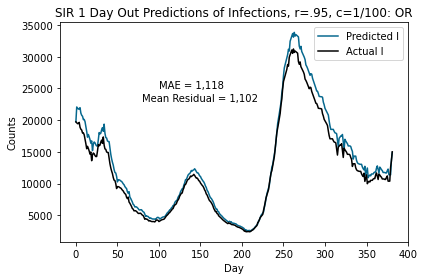

In [40]:
# initialize 
S = pd.Series( np.zeros((len(df),)) )
I = pd.Series( np.zeros((len(df),)) )
r = 0.95 # Initial susceptable ratio
S[0] = r*p # initial susceptable population
I[0] = df['I_actual'].copy()[0]
V = df['V']
for day in range(0,len(df) -1):
    S[day+1], I[day+1] = next_day_SI_withC(S[day],df['I_actual'][day],V[day])

# plt.plot(S,label='S')
# 06688e, 000000
fig = plt.figure()
plt.plot(I, label='Predicted I', color = '#06688e')
plt.plot(range(len(df)) , df['I_actual'] , label ='Actual I', color = '#000000')
plt.title('SIR 1 Day Out Predictions of Infections, r=.95, c=1/100: OR')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.text(x=100,y=25000, s= f"MAE = {round(mean_absolute_error(I,df['I_actual']  )):,d}")
plt.text(x=80,y=23000, s= f"Mean Residual = {round(np.mean(I.values-df['I_actual'].values ) ):,d}")
plt.legend()
plt.tight_layout()
fig.savefig('images/one_day_OR.png');

We can see that is model very consistently over-predicted each day, even though it was predicting on the previous day's model output. Once again, we see that SIR with reasonable values of the paramters heavily over predicts the spread COVID. 

### 3.2.1) Gridsearch over $r$ to optimize one day SIR predictions

The model depends on $r=\frac{S_0}{p - I_0}$, and we are not at all certain about that value. I will search for an optimal value below.

In [41]:
score_df = pd.DataFrame(columns = ['r','MAE'])

for r in np.linspace(.32,.35,100):
    S[0] = r*p # initial susceptable population
    for day in range(0,len(df) -1):
        S[day+1], I[day+1] = next_day_SI_withC(S[day],df['I_actual'][day],V[day])
    mae = mean_absolute_error(I,df['I_actual'] )
    score_df.loc[len(score_df)] = [r,mae]
score_df.sort_values(by='MAE').iloc[1]

r        0.320303
MAE    797.978758
Name: 1, dtype: float64

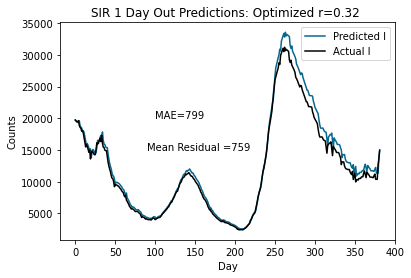

In [43]:
S[0] = 0.323*p # initial susceptable population

for day in range(0,len(df) -1):
    S[day+1], I[day+1] = next_day_SI_withC(S[day],df['I_actual'][day],V[day])

# plt.plot(S,label='S')
plt.plot(I, label='Predicted I', color = '#06688e')
plt.plot(range(len(df)) , df['I_actual'] , label ='Actual I', color = '#000000')
plt.title('SIR 1 Day Out Predictions: Optimized r=0.32 ')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.text(x=100,y=20_000, s= f"MAE={round(mean_absolute_error(I,df['I_actual']  ))}")
plt.text(x=90,y=15_000, s= f"Mean Residual ={round(np.mean(I.values-df['I_actual'].values ) )}")
plt.legend();

With $r$ optimized to an unreasonably low value, sir still over predicts by, on average, 7,478 cases per day. Thus, if SIR is to have a mean residual near zero then it will need to do so by changing another paramter. The parameter what we are second most sure about is the deimmunizatoin rate $c$.

### 3.2.2) Gridsearch over $r$ and $c$ to optimize one day SIR predictions

In [44]:
score_df = pd.DataFrame(columns = ['r','c','MAE'])

for r in np.linspace(.32,.35,10):
    for c in np.linspace(1/10_000, 1/10,10):
        S[0] = r*p # initial susceptable population
        for day in range(0,len(df) -1):
            S[day+1], I[day+1] = next_day_SI_withC(S[day],df['I_actual'][day],V[day])
        mae = mean_absolute_error(I,df['I_actual'] )
        score_df.loc[len(score_df)] = [r,c,mae]
score_df.sort_values(by='MAE').iloc[1]

r        0.323333
c        0.011200
MAE    860.146863
Name: 11, dtype: float64

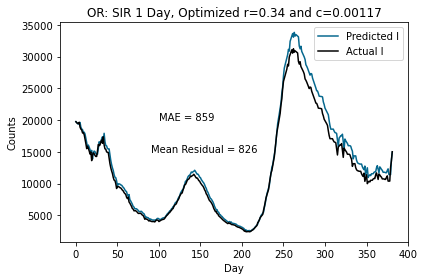

In [48]:
r = 0.32 # Initial susceptable ratio
c = 0.0112
S[0] = r*p # initial susceptable population
I[0] = df['I_actual'].copy()[0]
V = df['V']
for day in range(0,len(df) -1):
    S[day+1], I[day+1] = next_day_SI_withC(S[day],df['I_actual'][day],V[day])

fig = plt.figure()

plt.plot(I, label='Predicted I', color = '#06688e')
plt.plot(range(len(df)) , df['I_actual'] , label ='Actual I', color = '#000000')
plt.title('OR: SIR 1 Day, Optimized r=0.34 and c=0.00117')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.text(x=100,y=20_000, s= f"MAE = {round(mean_absolute_error(I,df['I_actual']  )):,d}")
plt.text(x=90,y=15_000, s= f"Mean Residual = {round(np.mean(I.values-df['I_actual'].values ) ):,d}")
plt.legend()
plt.tight_layout()
fig.savefig('images/one_day_optimal_OR.png');

Minimizing the mean residual leaves us with 
- a large MAE
- an absurd values of $S_0$ of $32\%$ of the uninfected population initially recovered,
- an absurd value of $c$ of about once every thousand days a person loses immunity from COVID. 

## 3.3 Conclusion on fits to Oregon data
I conclude that SIR with reasonable values of the parameters overestimate one day predictions. This is likely because of the model's inability to resolve the many changes made in social distancing, masking, hand washing, et cetera. 

# 4) Were there times where heard immunity was reached? 

That is, were there times when $S$ was less than $\frac{b}{a}$? To answer this question, I will use the "reasonable values of paramters" described above, make one day predictions for $I$, and keep track of $S$.  

In [ ]:
#re-run with reasonable paramters
# initialize 
S = pd.Series( np.zeros((len(df),)) )
I = pd.Series( np.zeros((len(df),)) )
r = 0.8 # Initial susceptable ratio
S[0] = r*p # initial susceptable population
I[0] = df['I_actual'].copy()[0]
V = df['V']
for day in range(0,len(df) -1):
    S[day+1], I[day+1] = next_day_SI_withC(S[day],df['I_actual'][day],V[day])

plt.plot(S,label='Susceptable',color='r')
# plt.plot(I,label='I')
# plt.plot(p-S-I, label='R')
plt.hlines(y=b/a,xmin=0,xmax=400, label = 'Herd Immunity Threshold', color='salmon')
plt.legend();
plt.title('Susceptable Population Under Herd Immunity Threshold \nOnly After Mass Vaccination')
plt.xlabel('Day')
plt.ylabel('Counts')
plt.tight_layout()
plt.legend();

In [ ]:
df['I_pred'] = list(I.copy())
df['S_est'] = list(S)
p = 29_145_505 # population (of Texas)
b = 1/14 # Recovery rate for duration 14 days
a = 2.8*b/p # t

(df['S_est'] < b/a).sum()

# 5) ARIMA 1 Day Predictions

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# getting a single day's prediction before building a loop
# ARIMA warnings suck
import warnings
warnings.filterwarnings('ignore')

# lets do one day: 
day = 20
y = df['I_actual'].copy() #nickname for brevity
print(f'today is {y.index[day]}')
# print(f"The number of people infected is {y[y.index[day]]}")
# print(f'The days of the pandemic up to now were {y.index[0:day].values}')
# print(f'The number of infected on those days was {y[y.index[0:day]]}')

# train arima on those numbers and indices:
arima = ARIMA( endog = y[y.index[0:day]], order =(1,0,0) )      
model = arima.fit()

print(f'We want to predict the number of infected on day {y.index[day+1]}')


I_next = model.predict( start = y.index[day+1], end = y.index[day+1]   )
print(f'ARIMA(1,0,0) predicts {I_next[0]}')

In [ ]:
# building a loop to make one day predictions for ... almost every day
y = df['I_actual'].copy()
# initialize the series I 
I = pd.Series( np.zeros((len(df),)) )

In [ ]:
# choosing a value of p, putting in the initial p values of I as actual values
p = 1

In [ ]:
I[0:p+1] = df['I_actual'][0:p+1]

In [ ]:
for day in range(p+2,len(df)): #len(df) -1 ): # need 3 days to get 2 points; will not work for p+1 or p
    arima = ARIMA( endog = y[y.index[0:day]], order =(1,0,0) )      
    model = arima.fit()
    I[day+1] = model.predict( start = y.index[day+1], end = y.index[day+1]   )
    

In [ ]:

plt.plot(I, label='Predicted I')
plt.plot(y.values, label='Actual I')
plt.title('Arima(1,0,0) 1 Day Out Predictions of Infections')
plt.xlabel('Day')
plt.ylabel('Infected')
plt.text(x=100,y=200_000, s= f"MAE={round(mean_absolute_error(I,df['I_actual']  ),3)}")
plt.plot(y[y.index[HI]].values)
plt.legend();

# 6) SIR and ARIMA 1-day Predictions for all states

In [ ]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
          # 'HI', 
          'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [ ]:
df = pd.read_csv('../data/I_V_all_states.csv')
df['key_0'] = pd.to_datetime(df['key_0'])
df.set_index('key_0',inplace=True)


In [ ]:
populations = { 'AK':733391,'AL':5024279, 'AR':3011524, 'AZ':7_151_502, 
               'CA': 39_538_223, 'CO':5773714, 'CT':3605944, 'DC':689545, 
               'DE':989948, 'FL':21_538_187, 'GA':10_711_908,
               #            'HI', 
          'IA':3190369, 'ID':1839106, 'IL':12_812_508, 'IN':6785528, 'KS':2937880, 
               'KY':4505836, 'LA':4657757,'MA':7_029_917,'MD':6177224, 
               'ME':1362359,'MI':10_077_331,'MN':5706494,'MO':6154913, 
               'MS':2961279,'MT':1084225, 'NC':10_439_388, 
               'ND':779094, 'NE':1961504, 'NH':1377529,'NJ':9_288_994, 
               'NM':2117522,'NV':3104614, 'NY':20_201_249,'OH':11_799_448, 
               'OK':3959353, 'OR':4237256,'PA':13_002_700,'RI':1097379, 
               'SC':5118425, 'SD':886667, 'TN':6910840, 'TX':29_145_505,
           'UT':3271616, 'VA':8_631_393, 'VT':643077,'WA':7_705_281, 
               'WI':5893718, 'WV':1793716,'WY':576851}

## 6.1) SIR Predictions for all states

In [188]:
def next_day_SI_withC(S,I,V,p):
    '''Predicts the number of infected tomorrow and number of susceptable tomorrow
    from number of infrected today 
    and number susceptable today'''
    #parameters 
    b = 1/14 # Recovery rate for duration 14 days
    a = 2.8*b/p # transmission rate for reproduction number 2.8 and recovery rate 1/14
    c = 1/100 # rate of immunity loss
    
    S_next = S - a*S*I +c*(p-S-I) -V
    I_next = I + a*S*I -b*I
    return S_next,I_next

In [189]:
# initialize series
S = pd.Series( np.zeros((len(df),)) )
I = pd.Series( np.zeros((len(df),)) )
r = 0.95 # Initial susceptable ratio
c = 1/100


In [190]:
# initialize 
for state in states: # this will become a for loop over states
    S[0] = r*populations[state] # initial susceptable population
    I[0] = df[f'{state}_I'].copy()[0]

    for day in range(0,len(df) -1):
        S[day+1], I[day+1] = next_day_SI_withC(S[day], #S
                                               df[f'{state}_I'][day],  #I
                                               df[f'{state}_V'][day], #V
                                               populations[state]) # p
    df[f'{state}_I_SIR'] = list(I)
    df[f'{state}_S_SIR'] = list(S)

/var/folders/kl/2yh74fss7jj3r6_9sk1_4fmm0000gn/T/ipykernel_27804/1882675996.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{state}_I_SIR'] = list(I)
/var/folders/kl/2yh74fss7jj3r6_9sk1_4fmm0000gn/T/ipykernel_27804/1882675996.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{state}_S_SIR'] = list(S)


In [191]:
df.isnull().sum().sum()

0

## 6.2) ARIMA predictions for all states

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
for state in states:
    # a loop to make one day predictions for ... almost every day
    y = df[f'{state}_I'].copy()
    # initialize the series I 
    I = pd.Series( np.zeros((len(df),))) 

    delay = 100
    I[0:delay] = df[f'{state}_I'][0:delay]
    for day in range(delay,len(df) -1 ): 
        arima = ARIMA( endog = y[y.index[0:day]], order =(3,2,0) )      
        model = arima.fit()
        I[day+1] = model.predict( start = y.index[day+1], end = y.index[day+1]   )
    df[f'{state}_I_ARIMA'] = list(I) 

In [ ]:
df.head(1).T

In [193]:
df.to_csv('../data/shabang.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Columns: 251 entries, key_0 to WY_I_ARIMA
dtypes: float64(250), object(1)
memory usage: 749.2+ KB


## Tableau friendly form 

In [ ]:
state_dfs =[]
for state in states: #state ='AK'
#     df.columns.str.contains(state) # a filter 
    five = df[df.columns[df.columns.str.contains(state)]]
    column5 = five.columns.str.replace( f'{state}_','')
    new = pd.DataFrame(data = five.values, columns=column5)
    print(df.columns[df.columns.str.contains(state)])
#     state_dfs.append(new)
    
# shabang_long = pd.concat(state_dfs)

# shabang_long # I am defeated. 

In [ ]:
df = pd.read_csv('../data/david/shabang.csv')
df.columns[df.columns.str.contains('_S_')]

In [ ]:
populations = { 'AK':733391,'AL':5024279, 'AR':3011524, 'AZ':7_151_502, 
               'CA': 39_538_223, 'CO':5773714, 'CT':3605944, 'DC':689545, 
               'DE':989948, 'FL':21_538_187, 'GA':10_711_908,
               #            'HI', 
               'IA':3190369, 'ID':1839106, 'IL':12_812_508, 'IN':6785528, 'KS':2937880, 
               'KY':4505836, 'LA':4657757,'MA':7_029_917,'MD':6177224, 
               'ME':1362359,'MI':10_077_331,'MN':5706494,'MO':6154913, 
               'MS':2961279,'MT':1084225, 'NC':10_439_388, 
               'ND':779094, 'NE':1961504, 'NH':1377529,'NJ':9_288_994, 
               'NM':2117522,'NV':3104614, 'NY':20_201_249,'OH':11_799_448, 
               'OK':3959353, 'OR':4237256,'PA':13_002_700,'RI':1097379, 
               'SC':5118425, 'SD':886667, 'TN':6910840, 'TX':29_145_505,
               'UT':3271616, 'VA':8_631_393, 'VT':643077,'WA':7_705_281, 
               'WI':5893718, 'WV':1793716,'WY':576851}

b = 1/14

for state in populations.keys:
    a = 2.8*b/populations[state]
    df[f'{state}_HI'] = (df[f'{state}_S_SRI'] <= b/a ).astype(int)